# Chapter 14: GraphX 
## Ex1: 

1. Hãy tạo 1 graph như hình sau: <br/>
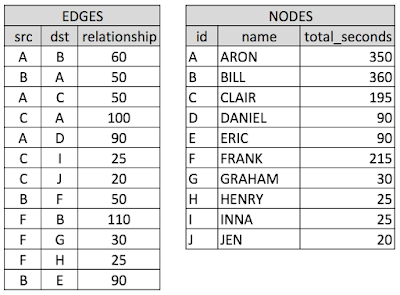

2. In danh sách đỉnh (vertices) và danh sách cạnh (edges) của graph.
3. Trực quan hóa graph
4. Hãy in danh sách degree, indegree, outdegree của các đỉnh.
5. Liệt kê các đỉnh có indegree >=2
6. Liệt kê các đỉnh có total_seconds từ 100 đến 350
7. Cho biết graph này có bao nhiêu component?
8. Cho biết mỗi đỉnh có tham gia vào bao nhiêu tam giác?
9. Xác định pagerank của từng đỉnh
10. Phân cụm cho graph

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz
!tar -xvf spark-2.4.8-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.8-bin-hadoop2.7"
import findspark
findspark.init()

spark-2.4.8-bin-hadoop2.7/
spark-2.4.8-bin-hadoop2.7/LICENSE
spark-2.4.8-bin-hadoop2.7/NOTICE
spark-2.4.8-bin-hadoop2.7/R/
spark-2.4.8-bin-hadoop2.7/R/lib/
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/DESCRIPTION
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/INDEX
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/Meta/
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/Meta/Rd.rds
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/Meta/features.rds
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/Meta/hsearch.rds
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/Meta/links.rds
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/Meta/nsInfo.rds
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/Meta/package.rds
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/NAMESPACE
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/R/
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/R/SparkR
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/R/SparkR.rdb
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/R/SparkR.rdx
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/help/
spark-2.4.8-bin-hadoop2.7/R/lib/SparkR/help/An

In [2]:
import os
import pyspark

In [3]:
from pyspark.sql import *

In [4]:
# Cài đặt và thiết lập biến môi trường

In [5]:
SUBMIT_ARGS = "--packages graphframes:graphframes:0.8.1-spark2.4-s_2.11 pyspark-shell"
os.environ["PYSPARK_SUBMIT_ARGS"] = SUBMIT_ARGS

In [6]:
conf = pyspark.SparkConf()
sc = pyspark.SparkContext(conf=conf)
print(sc._conf.getAll())

[('spark.repl.local.jars', 'file:///root/.ivy2/jars/graphframes_graphframes-0.8.1-spark2.4-s_2.11.jar,file:///root/.ivy2/jars/org.slf4j_slf4j-api-1.7.16.jar'), ('spark.files', 'file:///root/.ivy2/jars/graphframes_graphframes-0.8.1-spark2.4-s_2.11.jar,file:///root/.ivy2/jars/org.slf4j_slf4j-api-1.7.16.jar'), ('spark.executor.id', 'driver'), ('spark.app.name', 'pyspark-shell'), ('spark.driver.host', '4246676fc786'), ('spark.jars', 'file:///root/.ivy2/jars/graphframes_graphframes-0.8.1-spark2.4-s_2.11.jar,file:///root/.ivy2/jars/org.slf4j_slf4j-api-1.7.16.jar'), ('spark.rdd.compress', 'True'), ('spark.serializer.objectStreamReset', '100'), ('spark.master', 'local[*]'), ('spark.submit.deployMode', 'client'), ('spark.driver.port', '41023'), ('spark.submit.pyFiles', '/root/.ivy2/jars/graphframes_graphframes-0.8.1-spark2.4-s_2.11.jar,/root/.ivy2/jars/org.slf4j_slf4j-api-1.7.16.jar'), ('spark.ui.showConsoleProgress', 'true'), ('spark.app.id', 'local-1648214548324')]


### 1. Tạo graph

In [7]:
from graphframes import *

In [8]:
spark = SparkSession(sc)

In [9]:
vertices = spark.createDataFrame([
    ("A", "ARON"  ,350 ),
    ("B", "BILL"  ,360 ),
    ("C", "CLAIR" ,195 ),
    ("D", "DANIEL",90),
    ("E", "ERIC"  ,90),
    ("F", "FRANK" ,215 ),
    ("G", "GRAHAM",30 ),
    ("H", "HENRY" ,25 ),
    ("I", "INNA"  ,25 ),
    ("J", "JEN"   ,20 )
], ["id", "name", "total_seconds"])
edges = spark.createDataFrame([
    ("A", "B", 60),
    ("B", "A", 50),
    ("A", "C", 50),
    ("C", "A", 100),
    ("A", "D", 90),
    ("C", "I", 25),
    ("C", "J", 20),
    ("B", "F", 50),
    ("F", "B", 110),
    ("F", "G", 30),
    ("F", "H", 25),
    ("B", "E", 90)
],["src","dst","relationship"])

In [21]:
# 
g = GraphFrame(vertices, edges)

### 2. In danh sách đỉnh (vertices) và danh sách cạnh (edges) của graph.


In [11]:
## Take a look at the DataFrames


In [22]:
g.vertices.show()

+---+------+-------------+
| id|  name|total_seconds|
+---+------+-------------+
|  A|  ARON|          350|
|  B|  BILL|          360|
|  C| CLAIR|          195|
|  D|DANIEL|           90|
|  E|  ERIC|           90|
|  F| FRANK|          215|
|  G|GRAHAM|           30|
|  H| HENRY|           25|
|  I|  INNA|           25|
|  J|   JEN|           20|
+---+------+-------------+



### 3. Trực quan hóa graph

In [12]:
# https://networkx.org/
# https://networkx.org/documentation/stable/_downloads/networkx_reference.pdf
# https://networkx.org/documentation/stable/tutorial.html
import networkx as nx

In [13]:
import matplotlib.pyplot as plt

In [14]:
def PlotGraph(edge_list):
    Gplot=nx.Graph()
    for row in edge_list.select('src','dst').take(1000):
        Gplot.add_edge(row['src'],row['dst'])        
    #plt.subplot(121)
    nx.draw(Gplot, with_labels=True, font_weight='bold')

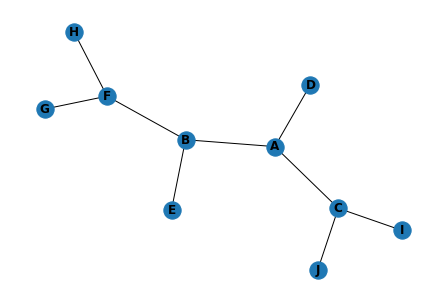

In [28]:
# plot
PlotGraph(g.edges)

In [16]:
# note: nếu bị lỗi AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'
# thì Downgrade matplotlib version to 2.2.3: pip install matplotlib==2.2.3

### 4. Hãy in danh sách degree, indegree, outdegree của các đỉnh.
-  inDegree is a number of head ends adjacent to a vertex and outDegree is a number of tail ends adjacent to a vertex. And simply degree is just a number of edges connected to a node regardless of the direction of edges

In [23]:
## Check the number of edges of each vertex
g.degrees.show()


+---+------+
| id|degree|
+---+------+
|  F|     4|
|  E|     1|
|  B|     5|
|  D|     1|
|  C|     4|
|  J|     1|
|  A|     5|
|  G|     1|
|  I|     1|
|  H|     1|
+---+------+



In [24]:
#in
g.inDegrees.show()

+---+--------+
| id|inDegree|
+---+--------+
|  F|       1|
|  E|       1|
|  B|       2|
|  D|       1|
|  C|       1|
|  J|       1|
|  A|       2|
|  G|       1|
|  I|       1|
|  H|       1|
+---+--------+



In [25]:
#out
g.outDegrees.show()

+---+---------+
| id|outDegree|
+---+---------+
|  F|        3|
|  B|        3|
|  C|        3|
|  A|        3|
+---+---------+



### 5. Liệt kê các đỉnh có indegree >=2 
### 6. Liệt kê các đỉnh có total_seconds từ 100 đến 350

In [26]:
type(g)

graphframes.graphframe.GraphFrame

In [ ]:
# filter

In [ ]:
#filter

### 7. Cho biết graph này có bao nhiêu component?

In [27]:
# GraphFrames requires you to set 
# a directory where it can save checkpoints
sc.setCheckpointDir('graphframes_cps')

In [ ]:
# component

- Chỉ có một componenet trong đồ thị.

### Motif finding


In [ ]:
mutualFriends = g.find("(a)-[]->(b); (b)-[]->(c); (c)-[]->(b); (b)-[]->(a)")\
                                                                .dropDuplicates()

In [ ]:
mutualFriends.show()

In [ ]:
mutualFriends.filter("a.id == 'A' and c.id == 'F'").show()

### 8. Cho biết mỗi đỉnh có tham gia vào bao nhiêu tam giác? (TriangleCount )

In [ ]:
#

### 9. Xác định pagerank của từng đỉnh

In [ ]:
#

In [ ]:
# look at the pagerank score for every vertex
#

In [ ]:
# look at the weight of every edge
#

### 10. Phân cụm cho graph

In [29]:
result = g.labelPropagation(maxIter=5)

result.sort(['label'],ascending=[0]).show()

+---+------+-------------+------------+
| id|  name|total_seconds|       label|
+---+------+-------------+------------+
|  D|DANIEL|           90|910533066752|
|  C| CLAIR|          195|910533066752|
|  E|  ERIC|           90|420906795008|
|  F| FRANK|          215|420906795008|
|  J|   JEN|           20|420906795008|
|  I|  INNA|           25|420906795008|
|  A|  ARON|          350|420906795008|
|  H| HENRY|           25|171798691840|
|  G|GRAHAM|           30|171798691840|
|  B|  BILL|          360|171798691840|
+---+------+-------------+------------+

